In [1]:
import numpy as np
from astropy import units as u

an Earth composition core satisfies a relation : 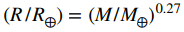

In [2]:
def avg_rho_from_Mp(Mp,verbose = 0):
    '''take a mass value and calculate avg core density using Valencia et al. 2006'''
    Rp = ((Mp/u.Mearth)**0.27)*u.Rearth # Valencia et al. 2006
    rhop = Mp / (4*np.pi*(Rp**3)/3)
    rhop_cgs = rhop.cgs
    Mp_Smass = Mp.to(u.Msun)
    if verbose == 1:
        print("for planet mass : {f}".format(f = Mp), "\n\t\tor {g}".format(g = Mp.to(u.Msun)))
        print("planet core avg rho : {f}".format(f = rhop_cgs))
    if verbose == 2:
        print(Rp)
        print(rhop)
        print(rhop_cgs)
        print("for planet mass : {f}".format(f = Mp))
        print("\n\tor {g}".format(g = Mp.to(u.Msun)))
        print("planet core avg rho : {f}".format(f = rhop_cgs))
    return (rhop_cgs,Mp_Smass)

In [3]:
# Re = 1*u.Rearth
# Me = 1*u.Mearth
# Mp = 10*u.Mearth

In [4]:
with open('inlist_1b_core') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[14], lines[15], lines[51])
    f.close

      saved_model_name = "planet_1a_create.mod"
       save_model_filename = "planet_1b_core_10ME.mod"
       new_core_mass = 3.0034893488507933e-05 ! 10 Mearth in Msun units
       core_avg_rho = 8.51078118665938 ! g/cm^3
 	star_history_name = "history_1b_core_15=ME"



In [5]:
m_multiples = np.array([3,5,7,10,12])
masses_in_Emass = m_multiples * u.Mearth
files_to_write = []
fnames = []
for i,mass in enumerate(masses_in_Emass):
    avg_rho_cgs, Mp_Smass = avg_rho_from_Mp(mass,verbose = 1)
    with open('inlist_1b_core') as f:
        lines = f.readlines()
        lines[10] = "\tsave_model_filename = \"planet_1b_core_"+str(m_multiples[i])+"ME.mod\"\n"
        lines[14] = "\tnew_core_mass = "+str(Mp_Smass.value)+" ! "+str(m_multiples[i])+" Mearth in Msun units\n"
        lines[15] = "\tcore_avg_rho = "+str(avg_rho_cgs.value)+" ! g/cm^3\n"
        lines[51] = "\tstar_history_name = \"history_1b_core_"+str(m_multiples[i])+"=ME\"\n"
        files_to_write.append(lines)
        fnames.append("inlist_1b_core_"+str(m_multiples[i])+"ME")
        f.close
    print(fnames[-1])
    print("\n")

for planet mass : 3.0 earthMass 
		or 9.01046804655238e-06 solMass
planet core avg rho : 6.7705268276637325 g / cm3
inlist_1b_core_3ME


for planet mass : 5.0 earthMass 
		or 1.5017446744253966e-05 solMass
planet core avg rho : 7.460599481094487 g / cm3
inlist_1b_core_5ME


for planet mass : 7.0 earthMass 
		or 2.1024425441955554e-05 solMass
planet core avg rho : 7.953129470852457 g / cm3
inlist_1b_core_7ME


for planet mass : 10.0 earthMass 
		or 3.0034893488507933e-05 solMass
planet core avg rho : 8.51078118665938 g / cm3
inlist_1b_core_10ME


for planet mass : 12.0 earthMass 
		or 3.604187218620952e-05 solMass
planet core avg rho : 8.81076994423131 g / cm3
inlist_1b_core_12ME




In [6]:
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [7]:
with open('inlist_1c_reducemass') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[16], lines[59])
    f.close

      saved_model_name = "planet_1b_core_15ME.mod"
       save_model_filename = "planet_1c_reducemass_15ME_0.1.mod" !!Change Mcore and fenv in file name
       new_mass = 5.00737e-05   ! careful, this mass has to be written in solar masses!!
 	star_history_name = "history_1c_reducemass_15ME_0.1"   !!Change Mcore and fenv in file name 



In [8]:
# fenv = Menv / Mp
# Mp = Menv + Mc
# Mp = Mc / (1-fenv)
core_masses = np.array([3,5,7,10,12]) * u.Mearth
# print(core_masses)
fenvs = np.array([0.1,0.01])
total_masses = []
for fenv in fenvs:
    plant_mass_array = []
    for mass in core_masses:
        plant_mass_array.append(mass/(1-fenv))
    total_masses.append(plant_mass_array)
newmass_fp1 = []
newmass_fp01 = []
for planet_mass in total_masses[0]:
    newmass_fp1.append(planet_mass.to(u.Msun))
for planet_mass in total_masses[1]:
    newmass_fp01.append(planet_mass.to(u.Msun))
print(newmass_fp1)
print(newmass_fp01)
total_masses_Msun = [newmass_fp1,newmass_fp01]

[<Quantity 1.00116312e-05 solMass>, <Quantity 1.66860519e-05 solMass>, <Quantity 2.33604727e-05 solMass>, <Quantity 3.33721039e-05 solMass>, <Quantity 4.00465247e-05 solMass>]
[<Quantity 9.10148288e-06 solMass>, <Quantity 1.51691381e-05 solMass>, <Quantity 2.12367934e-05 solMass>, <Quantity 3.03382763e-05 solMass>, <Quantity 3.64059315e-05 solMass>]


msun_core_masses = core_masses.to(u.Msun)

# test the above calculation
for i, core in enumerate(msun_core_masses):
    print(1-(core/newmass_fp1[i]))
for i, core in enumerate(msun_core_masses):
    print(1-(core/newmass_fp01[i]))

In [9]:
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        with open('inlist_1c_reducemass') as f:
            lines = f.readlines()
            lines[7] = "\tsaved_model_name = \"planet_1b_core_"+str(m_multiples[i])+"ME.mod\"\n"
            lines[10] = "\tsave_model_filename = \"planet_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv)+".mod\" !!Change Mcore and fenv in file name\n"
            lines[16] = "\tnew_mass = "+str(total_masses_Msun[j][i].value)+"   ! careful, this mass has to be written in solar masses!!\n"
            lines[59] = "\tstar_history_name = \"history_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv)+"\"   !!Change Mcore and fenv in file name\n"
            files_to_write.append(lines)
            fnames.append("inlist_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv))
            f.close
        print(fnames[-1])
        print("\n")

inlist_1c_reducemass_3ME_0.1


inlist_1c_reducemass_5ME_0.1


inlist_1c_reducemass_7ME_0.1


inlist_1c_reducemass_10ME_0.1


inlist_1c_reducemass_12ME_0.1


inlist_1c_reducemass_3ME_0.01


inlist_1c_reducemass_5ME_0.01


inlist_1c_reducemass_7ME_0.01


inlist_1c_reducemass_10ME_0.01


inlist_1c_reducemass_12ME_0.01




print(files_to_write[-1][7], files_to_write[-1][10], files_to_write[-1][16], files_to_write[-1][59])

In [10]:
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

# entropy change

In [11]:
with open('inlist_1d_setS') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[52])
    f.close

      saved_model_name = "planet_1c_reducemass_15ME_0.1.mod"
       save_model_filename = "planet_1d_setS_15ME_0.1_9.0.mod"
 	star_history_name = "history_1d_setS_15ME_0.1_9.0"



In [12]:
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        with open('inlist_1d_setS') as f:
            lines = f.readlines()
            lines[7] = "\tsaved_model_name = \"planet_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv)+".mod\"\n"
            lines[10] = "\tsave_model_filename = \"planet_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0.mod\"\n"
            lines[52] = "\tstar_history_name = \"history_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0\"\n"
            files_to_write.append(lines)
            fnames.append("inlist_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0")
            f.close
        print(fnames[-1])
        print("\n")

inlist_1d_setS_3ME_0.1_9.0


inlist_1d_setS_5ME_0.1_9.0


inlist_1d_setS_7ME_0.1_9.0


inlist_1d_setS_10ME_0.1_9.0


inlist_1d_setS_12ME_0.1_9.0


inlist_1d_setS_3ME_0.01_9.0


inlist_1d_setS_5ME_0.01_9.0


inlist_1d_setS_7ME_0.01_9.0


inlist_1d_setS_10ME_0.01_9.0


inlist_1d_setS_12ME_0.01_9.0




In [17]:
# test lines
print(files_to_write[-1][7],files_to_write[-1][10],files_to_write[-1][52])

	saved_model_name = "planet_1c_reducemass_12ME_0.01.mod"
 	save_model_filename = "planet_1d_setS_12ME_0.01_9.0.mod"
 	star_history_name = "history_1d_setS_12ME_0.01_9.0"



In [13]:
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [14]:
# make execution script for 1d
script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS "+fn+"\n")
    script.append("ls\n")

print(script)

In [15]:
# scp command for file transfer
namestring = "script_1d "
for n in fnames:
    namestring = namestring + n + " "

print("scp "+namestring+"qadeer@student33.strw.leidenuniv.nl:/home/qadeer/Desktop/eia2022/ass1/Lab1/Lab1/")

scp script_1d inlist_1d_setS_3ME_0.1_9.0 inlist_1d_setS_5ME_0.1_9.0 inlist_1d_setS_7ME_0.1_9.0 inlist_1d_setS_10ME_0.1_9.0 inlist_1d_setS_12ME_0.1_9.0 inlist_1d_setS_3ME_0.01_9.0 inlist_1d_setS_5ME_0.01_9.0 inlist_1d_setS_7ME_0.01_9.0 inlist_1d_setS_10ME_0.01_9.0 inlist_1d_setS_12ME_0.01_9.0 qadeer@student33.strw.leidenuniv.nl:/home/qadeer/Desktop/eia2022/ass1/Lab1/Lab1/


In [16]:
with open('script_1d.txt','w') as f:
    f.writelines(script)
    f.close